# **2 Data Wrangling: Air Quality**

In this stage of the project, we will focus on ingesting the data, performing initial exploration, handling missing values, describing basic statistics, and preparing a clean dataset for the subsequent exploratory data analysis (EDA) stage. Here are the detailed steps and the corresponding Python code:

## **Methodology**

* [1. Data Ingestion](#1_di): Load the dataset from a CSV file into a Pandas DataFrame.
* [2. Initial Exploration](#2_ie): Perform a preliminary examination of the dataset to understand its structure and contents.
* [3. Handling Duplicated Records](#3_hdr): Drop duplicated records found in the dataset (if any).
* [4. Handling Missing Values](#4_hmv): Identify and handle missing values appropriately.
* [5. Exploring Unique Values in Categorical Features](#5_euvcf): Check the unique values in each column.
* [6. Data Type Verification](#6_dtvrf): Ensure each column has the correct data type and convert if necessary.
* [7. Data Saving in 'staged'](#7_sdt): Save a new cleaned dataset for the EDA.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

### **1. Data Ingestion**<a id='1_di'></a>

Load the dataset into a Pandas DataFrame

In [3]:
# Load the raw dataset
file_path = '../data/raw/city_day.csv' 
df = pd.read_csv(file_path)

---

### **2. Initial Exploration**<a id='2_ie'></a>

Exploring the dataset

In [4]:
# Initial data snapshot
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Based on the initial inpection of the data and referencing to our [data source](https://cpcb.nic.in/). We can define the columns as follows:

| Column      | Description                      | Datatype | Missing Values |
|-------------|----------------------------------|----------|----------------|
| `City`        | Name of the city                 | object   | 0              |
| `Date`        | Date of the observation          | object   | 0              |
| `PM2.5`       | Particulate Matter < 2.5 µm      | float64  | 4598           |
| `PM10`        | Particulate Matter < 10 µm       | float64  | 11140          |
| `NO`          | Nitric Oxide                     | float64  | 3582           |
| `NO2`         | Nitrogen Dioxide                 | float64  | 3585           |
| `NOx`         | Nitrogen Oxides                  | float64  | 4185           |
| `NH3`         | Ammonia                          | float64  | 10328          |
| `CO`          | Carbon Monoxide                  | float64  | 2059           |
| `SO2`         | Sulfur Dioxide                   | float64  | 3854           |
| `O3`          | Ozone                            | float64  | 4022           |
| `Benzene`     | Benzene                          | float64  | 5623           |
| `Toluene`     | Toluene                          | float64  | 8041           |
| `Xylene`      | Xylene                           | float64  | 18109          |
| `AQI`         | Air Quality Index                | float64  | 4681           |
| `AQI_Bucket`  | Air Quality Category             | object   | 4681           |


As we can observe, our data has multiple missing values in it, thus we need to handle them appropriately for the next stages. However, before that, let's make sure we drop any duplicated records as a first step.

---

### **3. Handling duplicated records**<a id='3_hdr'></a>

In this section we will be dropping any duplicated rows (if any). This is a crucial part for assuring data quality and it is paramount for preventing data leakage when getting into the modeling part of the project.

In [6]:
# Count the number of duplicate records
num_duplicates = df.duplicated().sum()

# Drop all duplicate records
data_cleaned = df.drop_duplicates()

print(f"Number of duplicate records dropped: {num_duplicates}")

Number of duplicate records dropped: 0


No duplicates!

---

### **4. Handling missing values**<a id='4_hmv'></a>

In this section we will explore the number of missing values on each column and plot a visualization for easier representation of the missing values.

In [7]:
# Number of missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n")
print(missing_values)

Missing Values per Column:

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


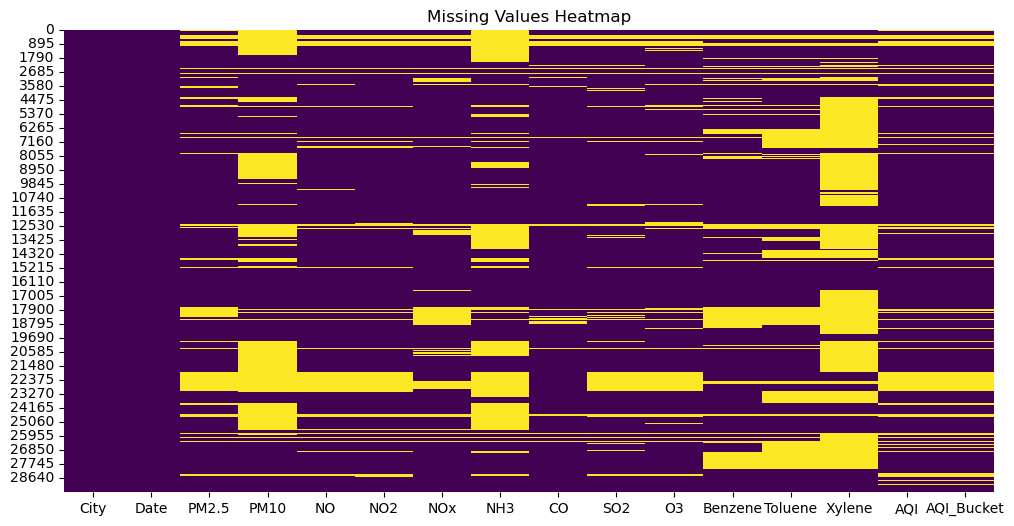

In [8]:
# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

#### Analysis of Missing Values

The dataset contains a significant number of missing values across various columns.

1. **Columns with No Missing Values:**
   - `City`
   - `Date`

2. **Columns with Few Missing Values (less than 20%):**
   - `NO` (12.1% missing)
   - `NO2` (12.1% missing)
   - `NOx` (14.2% missing)
   - `CO` (7% missing)
   - `SO2` (13% missing)
   - `O3` (13.6% missing)
   - `AQI` (15.9% missing)
   - `AQI_Bucket` (15.9% missing)
   - `PM2.5` (15.6% missing)

3. **Columns with Moderate Missing Values (20% - 40%):**
   - `Benzene` (20% missing)
   - `PM10` (37.7% missing)
   - `NH3` (35% missing)
   - `Toluene` (27.2% missing)

4. **Columns with High Missing Values (more than 40%):**
   - `Xylene` (61.3% missing)

#### Handling Strategy (Numerical Columns)
   - **Median Imputation:** For numerical columns with few to moderate missing values.
   - **Dropping Columns/Rows:** For numerical columns with high missing values, it might be more practical to drop them. This is also supported by the notion of probably getting Xylene readings is quite more complex than any other particle, thus, being able to disregard this column could also be founded on a business logic.

In [9]:
# Columns categorized by the amount of missing values
columns_few_missing = ['NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'AQI', 'PM2.5']
columns_moderate_missing = ['Benzene', 'PM10', 'NH3', 'Toluene']
columns_high_missing = ['Xylene']

In [10]:
# Median imputation for columns with few and moderate missing values
for column in columns_few_missing + columns_moderate_missing:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

In [11]:
# Drop columns with high missing values
df = df.drop(columns=columns_high_missing)

In [12]:
# Number of missing values after handling
missing_values = df.isnull().sum()
print("Missing Values per Column After Handling:\n")
print(missing_values)

Missing Values per Column After Handling:

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
AQI              0
AQI_Bucket    4681
dtype: int64


#### Handling Strategy (Categorical Columns)

Regarding the AQI_Bucket attribute, which serves as our primary target variable, we'll omit any records with missing values. The absence of sufficient guidance on how to accurately impute these values, coupled with the potential impact on our modeling from arbitrary assumptions, necessitates this decision. Moreover, given that only 15% of records contain null values, the resulting data loss is deemed acceptable.

For future projects, alternative strategies could be explored for handling these null values. These may include developing models for imputation, leveraging domain expertise for inference, manual labeling, or enhancing data acquisition methods.

In [13]:
# Drop rows with missing values on target variable
df = df.dropna(axis=0)

In [14]:
# Number of missing values after handling
missing_values = df.isnull().sum()
print("Missing Values per Column After Handling:\n")
print(missing_values)

Missing Values per Column After Handling:

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64


---

### **5. Unique values in categorical features**<a id='5_euvcf'></a>

Now that we have effectively handled the missing values in pur dataset, let's explore the unique values in our categorical features.

In [15]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Get unique values for each categorical column
unique_values = {col: df[col].unique() for col in categorical_cols}

# Print unique values in a readable format
for col, values in unique_values.items():
    print(f"Column '{col}':\n {values}\n")

Column 'City':
 ['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']

Column 'Date':
 ['2015-01-29' '2015-01-30' '2015-01-31' ... '2015-03-07' '2016-06-09'
 '2016-06-26']

Column 'AQI_Bucket':
 ['Poor' 'Very Poor' 'Severe' 'Moderate' 'Satisfactory' 'Good']



---

### **6. Datatypes verification**<a id='6_dtvrf'></a>

Following this observation, our dataset features information from 26 unique cities, with each record having multiple dates and six distinct categories signifying air quality levels. Subsequently, we plan to perform basic transformations on two of these columns to ensure the datatype correctness:

1. `Date`: Conversion to a datetime format.
2. `AQI_Bucket`: Renaming the column as Air_Quality.

In [16]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Rename the 'AQI_Bucket' column
df.rename(columns={'AQI_Bucket': 'Air_Quality'}, inplace=True)

Verification of our dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         24850 non-null  object        
 1   Date         24850 non-null  datetime64[ns]
 2   PM2.5        24850 non-null  float64       
 3   PM10         24850 non-null  float64       
 4   NO           24850 non-null  float64       
 5   NO2          24850 non-null  float64       
 6   NOx          24850 non-null  float64       
 7   NH3          24850 non-null  float64       
 8   CO           24850 non-null  float64       
 9   SO2          24850 non-null  float64       
 10  O3           24850 non-null  float64       
 11  Benzene      24850 non-null  float64       
 12  Toluene      24850 non-null  float64       
 13  AQI          24850 non-null  float64       
 14  Air_Quality  24850 non-null  object        
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage

---

### **7. Saving dataset for EDA**<a id='7_sdt'></a>

In [18]:
# Save the processed dataframe to a CSV file
output_file_path = '../data/staged/air_dataset_staged.csv'
df.to_csv(output_file_path, index=False)

print(f"Processed dataframe saved to {output_file_path}")

Processed dataframe saved to ../data/staged/air_dataset_staged.csv
